## 1. BreaKHis Challenge (50 points)

Breast Cancer Histopathological Database (BreakHis) is composed of 9,109 microscopic images of breast tumor tissue collected from 82 patients. To date, it contains 2,480 benign and 5,429 malignant samples (700X460 pixels, 3-channel RGB, 8-bit depth in each channel, PNG format).

You are required to implement a CNN-based model to finish an image binary classification task for a subset of the BreakHis dataset that only contains images of 400x optical magnification. There are two classes in this dataset: benign tumors and malignant tumors, where benign corresponds to label 0 and malignant corresponds to label 1. The folder names describe the labels of the data they contain. 


**Grading Criteria:**

1. The code should execute without syntax errors. If the code fails to execute, your score for this whole question will be zero.

2. [40 points] The evaluation metric for the model is accuracy, with a minimum threshold of 0.7, corresponding to a base score of 20 points. For every increase of 0.01 in accuracy above this threshold, an additional point will be awarded. When the accuracy reaches or exceeds 0.9, you can obtain the maximum score of 40 points for this section. For example, if the accuracy is 0.86, then the corresponding score is $20 + (0.86 - 0.7) * 100 = 36$.

$$
Accuracy = \frac{TP+TN}{TP+FP+TN+FN}
$$

3. [10 points] You are required to provide a brief description of the deep learning model you use and explain the reasons why you choose it. The word limit for this section is 500 words, and the maximum score is 10 points. Evident inconsistencies between your description and the implemented model may lead to deductions in the corresponding score for this section. Also, exceeding the word limit will also lead to a deduction of points for this section.

4. Your code outputs should include: 
   - Training loss curve.
   - Accuracy on the test set.


**Requirements:**

1. You are required to complete your programming assignment on this Jupyter notebook and ensure that all code outputs are captured within this file for reproducibility. Other forms of submission (for example, an additional Python script) will not be accepted.

2. You must independently implement the deep learning model you utilize from scratch. Direct usage of convenient API interfaces such as those from `torch.hub` or HuggingFace `transformers` to accomplish this task is not permitted.

3. While the use of pre-trained model weights is allowed for this assignment, it is mandated that you fine-tune the pre-trained model. Directly utilizing pre-trained weights for inference on the test set is not permitted.

4. In this question, only deep learning methods based on convolutional neural networks (CNNs) are permitted. Other models such as the traditional machine learning methods with hand-crafted feature extraction methods (such as SIFT, HOG, etc.), Transformer-based models (such as vision Transformer, Swin Transformer, etc.), or the MLP-mixer and its variants, are not permitted to use.

5. You are not allowed to use additional data for training or fine-tuning.

6. Fine-tuning the model by using the test set is strictly prohibited. If you are found to do so, your score for this question will be zero.


### Download BreaKHis Dataset

In [3]:
# download the dataset (file size: 842 MB, downloading time usage: ~7 min)
# !wget -c https://zenodo.org/records/10100993/files/BreakHis.zip

# unzip the dataset
# !unzip BreakHis.zip

# remove the archive (optional)
# !rm -rf BreaKHis.zip

Archive:  BreakHis.zip
   creating: BreakHis/
   creating: BreakHis/test/
   creating: BreakHis/test/benign/
  inflating: BreakHis/test/benign/SOB_B_A-14-22549AB-400-001.png  
  inflating: BreakHis/test/benign/SOB_B_A-14-22549AB-400-003.png  
  inflating: BreakHis/test/benign/SOB_B_A-14-22549AB-400-004.png  
  inflating: BreakHis/test/benign/SOB_B_A-14-22549AB-400-005.png  
  inflating: BreakHis/test/benign/SOB_B_A-14-22549AB-400-007.png  
  inflating: BreakHis/test/benign/SOB_B_A-14-22549AB-400-011.png  
  inflating: BreakHis/test/benign/SOB_B_A-14-22549AB-400-015.png  
  inflating: BreakHis/test/benign/SOB_B_A-14-22549AB-400-019.png  
  inflating: BreakHis/test/benign/SOB_B_A-14-22549AB-400-025.png  
  inflating: BreakHis/test/benign/SOB_B_A-14-22549AB-400-027.png  
  inflating: BreakHis/test/benign/SOB_B_A-14-22549AB-400-028.png  
  inflating: BreakHis/test/benign/SOB_B_A-14-22549CD-400-004.png  
  inflating: BreakHis/test/benign/SOB_B_A-14-22549CD-400-006.png  
  inflating: BreakHi

# 对模型的描述
我刚开始写了三个卷积层，准确率到82。然后加到4个卷积层，准确率到84。既然有效，那我加到了8个卷积层，准确率到88。针对这个准确率88的，我又调整了一下学习率、学习率衰减步伐，准确率上90了。

然后我尝试了直接使用resnet50，第一个epoch准确率就到91了。

# Simple CNN

/home/student001/anaconda3/lib/python3.9/site-packages/torch/nn/parallel/data_parallel.py:33: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 1 which
    has less than 75% of the memory or cores of GPU 0. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))
/home/student001/anaconda3/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch 1, Loss: 0.5529458522796631
Epoch 2, Loss: 0.42320525646209717
Epoch 3, Loss: 0.3931594789028168
Epoch 4, Loss: 0.45659011602401733
Epoch 5, Loss: 0.4865305721759796
Epoch 6, Loss: 0.34450238943099976
Epoch 7, Loss: 0.2477208524942398
Epoch 8, Loss: 0.2437242567539215
Epoch 9, Loss: 0.3909095525741577
Epoch 10, Loss: 0.1714043766260147
Epoch 11, Loss: 0.37633267045021057
Epoch 12, Loss: 0.20599466562271118
Epoch 13, Loss: 0.25220704078674316
Epoch 14, Loss: 0.2579776644706726
Epoch 15, Loss: 0.28630802035331726
Epoch 16, Loss: 0.2154131382703781
Epoch 17, Loss: 0.30267924070358276
Epoch 18, Loss: 0.34918874502182007
Epoch 19, Loss: 0.23855049908161163
Epoch 20, Loss: 0.2974930703639984
Epoch 21, Loss: 0.23840999603271484
Epoch 22, Loss: 0.07800569385290146
Epoch 23, Loss: 0.3557666838169098
Epoch 24, Loss: 0.31718385219573975
Epoch 25, Loss: 0.2777247726917267
Epoch 26, Loss: 0.23249921202659607
Epoch 27, Loss: 0.3269519507884979
Epoch 28, Loss: 0.08319070935249329
Epoch 29, Loss

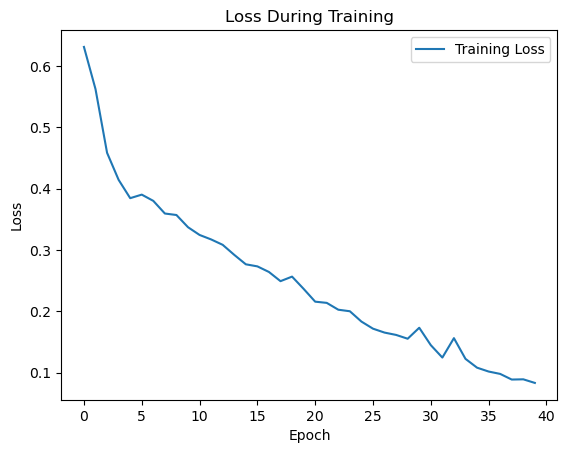

Total correct: 493, Total samples: 545
Accuracy on test set: 90.45871559633028%


In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.optim as optim

class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)

        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)

        self.conv7 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.conv8 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)

        self.adaptive_pool = nn.AdaptiveAvgPool2d((8, 6))

        self.fc1 = nn.Linear(512 * 8 * 6, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = self.pool(F.relu(self.conv6(x)))
        x = self.pool(F.relu(self.conv7(x)))
        x = self.pool(F.relu(self.conv8(x)))

        # 使用自适应池化层来调整维度
        x = self.adaptive_pool(x)

        # 展平特征
        x = x.view(-1, 512 * 8 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# 指定要使用的 GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,3,4"

# 检查 CUDA 是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 创建模型实例并移动到 GPU
model = ImprovedCNN().to(device)

# 如果有多个 GPU，使用 nn.DataParallel
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)

# 数据预处理
transform = transforms.Compose([
    transforms.Resize((700, 460)),  # 保持原始尺寸
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 加载数据集
train_dataset = datasets.ImageFolder(root='/home/student001/zhangwch/Studying-at-ShanghaiTech/AI for Science and Engineering_Zheng Jie/homework/CS286_homework1/BreakHis/train', transform=transform)
test_dataset = datasets.ImageFolder(root='/home/student001/zhangwch/Studying-at-ShanghaiTech/AI for Science and Engineering_Zheng Jie/homework/CS286_homework1/BreakHis/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 定义损失函数和优化器
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.9)

losses = []
num_epochs = 40
# 训练模型
for epoch in range(num_epochs):
    epoch_losses = []
    for data in train_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        outputs = outputs.squeeze()

        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
    scheduler.step()
    epoch_loss = sum(epoch_losses) / len(epoch_losses)
    losses.append(epoch_loss)
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

import matplotlib.pyplot as plt

plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss During Training')
plt.legend()
plt.show()

# Evaluation loop
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        outputs = outputs.squeeze()
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct_batch = (predicted == labels.float()).sum().item()
        correct += correct_batch

print(f"Total correct: {correct}, Total samples: {total}")
accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy}%')

# resnet50

In [5]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, models

# 指定要使用的 GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,3,4"

# 检查 CUDA 是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 创建模型实例并加载预训练的ResNet-50模型
model = models.resnet50(pretrained=True)
num_classes = 2  # 替换为您的任务的类别数量

# 替换最后一层（全连接层）以适应特定任务
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_classes)
)

# 将模型移动到 GPU（如果可用）
model = model.to(device)

# 数据预处理
transform = transforms.Compose([
    transforms.Resize((700, 460)),  # 保持原始尺寸
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 加载数据集
train_dataset = datasets.ImageFolder(root='/home/student001/zhangwch/Studying-at-ShanghaiTech/AI for Science and Engineering_Zheng Jie/homework/CS286_homework1/BreakHis/train', transform=transform)
test_dataset = datasets.ImageFolder(root='/home/student001/zhangwch/Studying-at-ShanghaiTech/AI for Science and Engineering_Zheng Jie/homework/CS286_homework1/BreakHis/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()  # 适用于多类别分类
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

num_epochs = 30
# 训练模型
for epoch in range(num_epochs):
    model.train()
    for data in train_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    scheduler.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

    # 在测试集上评估模型
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy on test set: {100 * correct / total}%')


/home/student001/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/student001/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1, Loss: 0.36428698897361755
Accuracy on test set: 91.19266055045871%
Epoch 2, Loss: 0.08305250853300095
Accuracy on test set: 95.77981651376147%
Epoch 3, Loss: 0.017863234505057335
Accuracy on test set: 96.5137614678899%
Epoch 4, Loss: 0.018875811249017715
Accuracy on test set: 96.88073394495413%
Epoch 5, Loss: 0.18125732243061066
Accuracy on test set: 94.12844036697248%
Epoch 6, Loss: 0.14052613079547882
Accuracy on test set: 96.5137614678899%
Epoch 7, Loss: 0.06743813306093216
Accuracy on test set: 96.88073394495413%
Epoch 8, Loss: 0.0066544609144330025
Accuracy on test set: 97.06422018348624%
Epoch 9, Loss: 0.006729133892804384
Accuracy on test set: 95.59633027522936%
Epoch 10, Loss: 0.01699107140302658
Accuracy on test set: 94.12844036697248%
Epoch 11, Loss: 0.0028979708440601826
Accuracy on test set: 97.06422018348624%
Epoch 12, Loss: 0.0040101222693920135
Accuracy on test set: 96.88073394495413%
Epoch 13, Loss: 0.009461077861487865
Accuracy on test set: 97.43119266055047%
